# `01` Import Necessary Libraries

In [1]:
import numpy as np

import pandas as pd
  
import matplotlib.pyplot as plt

import seaborn as sns
import time

## `ii` Additional Libraries

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder,RobustScaler

In [3]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.model_selection import StratifiedKFold

In [8]:
from sklearn.pipeline import make_pipeline

# `02` Load Data

# Introduction
<div style="font-size:120%"> 
    <b>Goal:</b> We have to predict obesity risk in individuals.<br><br>
    <b>Dataset Description:</b>
</div>

| Column | Full Form | Description| 
|---|---|---|
| 'id'| id | Unique for each person(row)|
|'Gender'| Gender| person's Gender|
| 'Age' | Age| Dtype is float. Age is between 14 years to 61 years |
|'Height'| Height | Height is in meter it's between 1.45m to 1.98m|
| 'Weight' | Weight| Weight is between 39 to 165. I think it's in KG.|
|'family_history_with_overweight'| family history <br> with overweight| yes or no question|
| 'FAVC'| Frequent consumption <br> of high calorie food| it's yes or no question. i think question they asked is <br>do you consume high calorie food|
|'FCVC'|  Frequency of <br>consumption of vegetables|  it takes number from 1  to 3 but in float|
|'NCP'| Number of main meals| dtype is float, NCP is between 1 & 4. I think it should be 1,2,3,4 <br>but our data is synthetic so it's taking float values|
|'CAEC'| Consumption of <br>food between meals| takes 4 values `Sometimes`, `Frequently`, `no` & `Always` <br>|
| 'SMOKE'| Smoke | yes or no question. i think the question is "Do you smoke?" |
|'CH2O'| Consumption of <br>water daily| CH2O takes values between 1 & 3. again it's given as <br>float may be because of synthetic data. it's values should be 1,2 or 3|
|'SCC'|  Calories consumption <br>monitoring| yes or no question|
|'FAF'| Physical activity <br>frequency| FAF is between 0 to 3, 0 means no physical activity<br> and 3 means high workout. and again, in our data it's given as float|
|'TUE'| Time using <br>technology devices| TUE is between 0 to 2. I think question will be "How long you have <br>been using technology devices to track your health." in our data it's given as float |
|'CALC'| Consumption of alcohol | Takes 3 values: `Sometimes`, `no`, `Frequently`|
| 'MTRANS' | Transportation used| MTRANS takes 5 values `Public_Transportation`, `Automobile`, <br>`Walking`, `Motorbike`, & `Bike`|
|'NObeyesdad'| TARGET | This is our target, takes 7 values, and in this comp. we have to give <br>the class name (Not the Probability, which is the case in most comp.)


<div style="font-size:120%"> 
    <b>NObeyesdad (Target Variable):</b>
</div>

* Insufficient_Weight : Less than 18.5
* Normal_Weight       : 18.5 to 24.9
* Obesity_Type_I      : 30.0 to 34.9
* Obesity_Type_II     : 35.0 to 39.9
* Obesity_Type_III   : Higher than 40
* Overweight_Level_I, Overweight_Level_II takes values between 25 to 29

In [9]:
train = pd.read_csv('train.csv')
train_orgin_extra=pd.read_csv("ObesityDataSet.csv")
test = pd.read_csv('test.csv')

train = pd.concat([train,train_orgin_extra], ignore_index=True)

train.shape

(22869, 18)

In [10]:
 pd.options.mode.copy_on_write = True 

In [11]:
train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,NaN,Female,20.976842,1.710730,131.408528,yes,yes,3.000000,3.000000,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
22865,NaN,Female,21.982942,1.748584,133.742943,yes,yes,3.000000,3.000000,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
22866,NaN,Female,22.524036,1.752206,133.689352,yes,yes,3.000000,3.000000,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
22867,NaN,Female,24.361936,1.739450,133.346641,yes,yes,3.000000,3.000000,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [12]:
train.drop("id",axis=1,inplace=True)

# ----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis


In [13]:
train_copy=train.copy()

In [14]:
train_copy

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,Female,20.976842,1.710730,131.408528,yes,yes,3.000000,3.000000,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
22865,Female,21.982942,1.748584,133.742943,yes,yes,3.000000,3.000000,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
22866,Female,22.524036,1.752206,133.689352,yes,yes,3.000000,3.000000,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
22867,Female,24.361936,1.739450,133.346641,yes,yes,3.000000,3.000000,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [15]:
train_copy["CALC"].unique()

array(['Sometimes', 'no', 'Frequently', 'Always'], dtype=object)

In [16]:
train_copy .describe().T

,count,mean,std,min,25%,50%,75%,max
Age,22869.0,23.885263,5.753419,14.00,20.000000,22.815416,26.000000,61.00
Height,22869.0,1.700377,0.087881,1.45,1.631662,1.700000,1.763029,1.98
Weight,22869.0,87.767610,26.364243,39.00,66.000000,84.000000,111.531208,173.00
FCVC,22869.0,2.443428,0.533329,1.00,2.000000,2.392665,3.000000,3.00
NCP,22869.0,2.754344,0.712711,1.00,3.000000,3.000000,3.000000,4.00
CH2O,22869.0,2.027442,0.608901,1.00,1.755907,2.000000,2.535127,3.00
FAF,22869.0,0.984382,0.839466,0.00,0.015860,1.000000,1.596576,3.00
TUE,22869.0,0.620551,0.602850,0.00,0.000000,0.579541,1.000000,2.00


In [17]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22869 entries, 0 to 22868
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22869 non-null  object 
 1   Age                             22869 non-null  float64
 2   Height                          22869 non-null  float64
 3   Weight                          22869 non-null  float64
 4   family_history_with_overweight  22869 non-null  object 
 5   FAVC                            22869 non-null  object 
 6   FCVC                            22869 non-null  float64
 7   NCP                             22869 non-null  float64
 8   CAEC                            22869 non-null  object 
 9   SMOKE                           22869 non-null  object 
 10  CH2O                            22869 non-null  float64
 11  SCC                             22869 non-null  object 
 12  FAF                             

In [18]:
# check for duplicate
train_copy.duplicated().sum()

24

In [19]:
# skewness
train_copy.select_dtypes(exclude="object").skew()

Age       1.585412
Height    0.013221
Weight    0.107990
FCVC     -0.363568
NCP      -1.513196
CH2O     -0.202471
FAF       0.505188
TUE       0.665457
dtype: float64

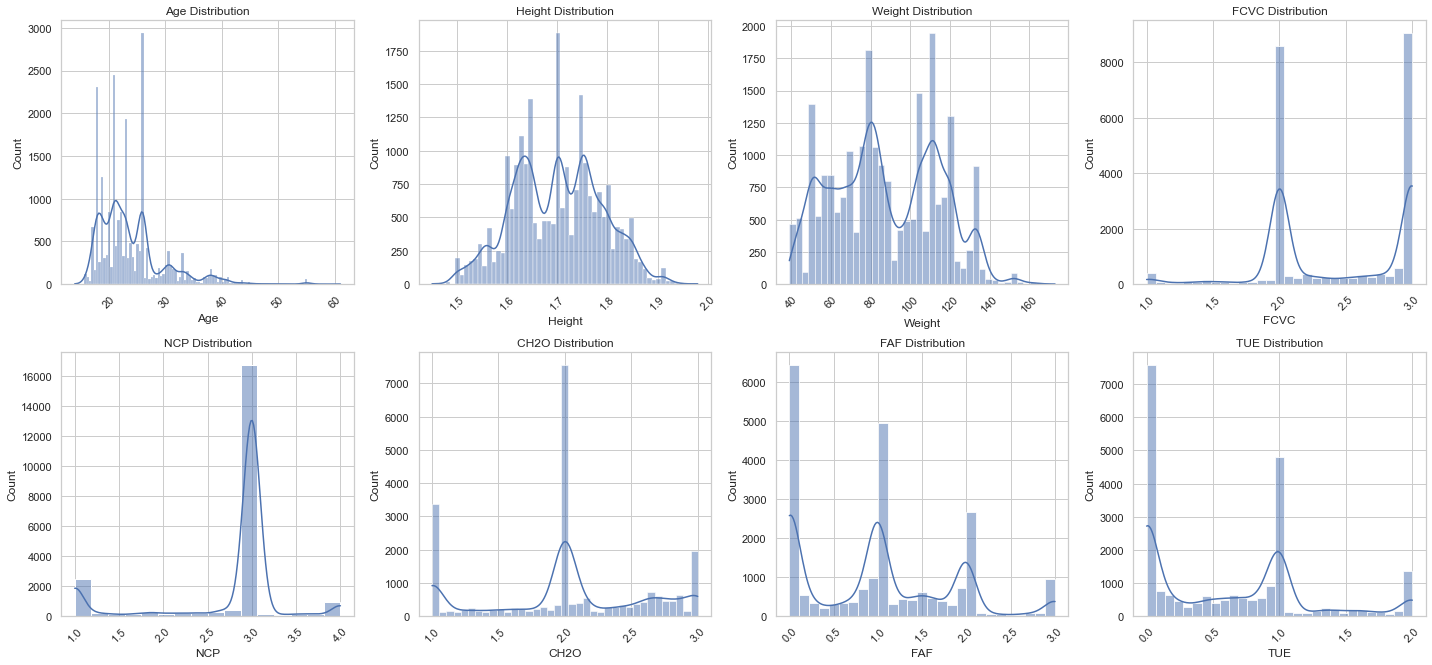

In [20]:
# plot numerical columns
sns.set(style="whitegrid")
numerical_columns = train_copy.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = train_copy.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(20, 6 * 3))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(train[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

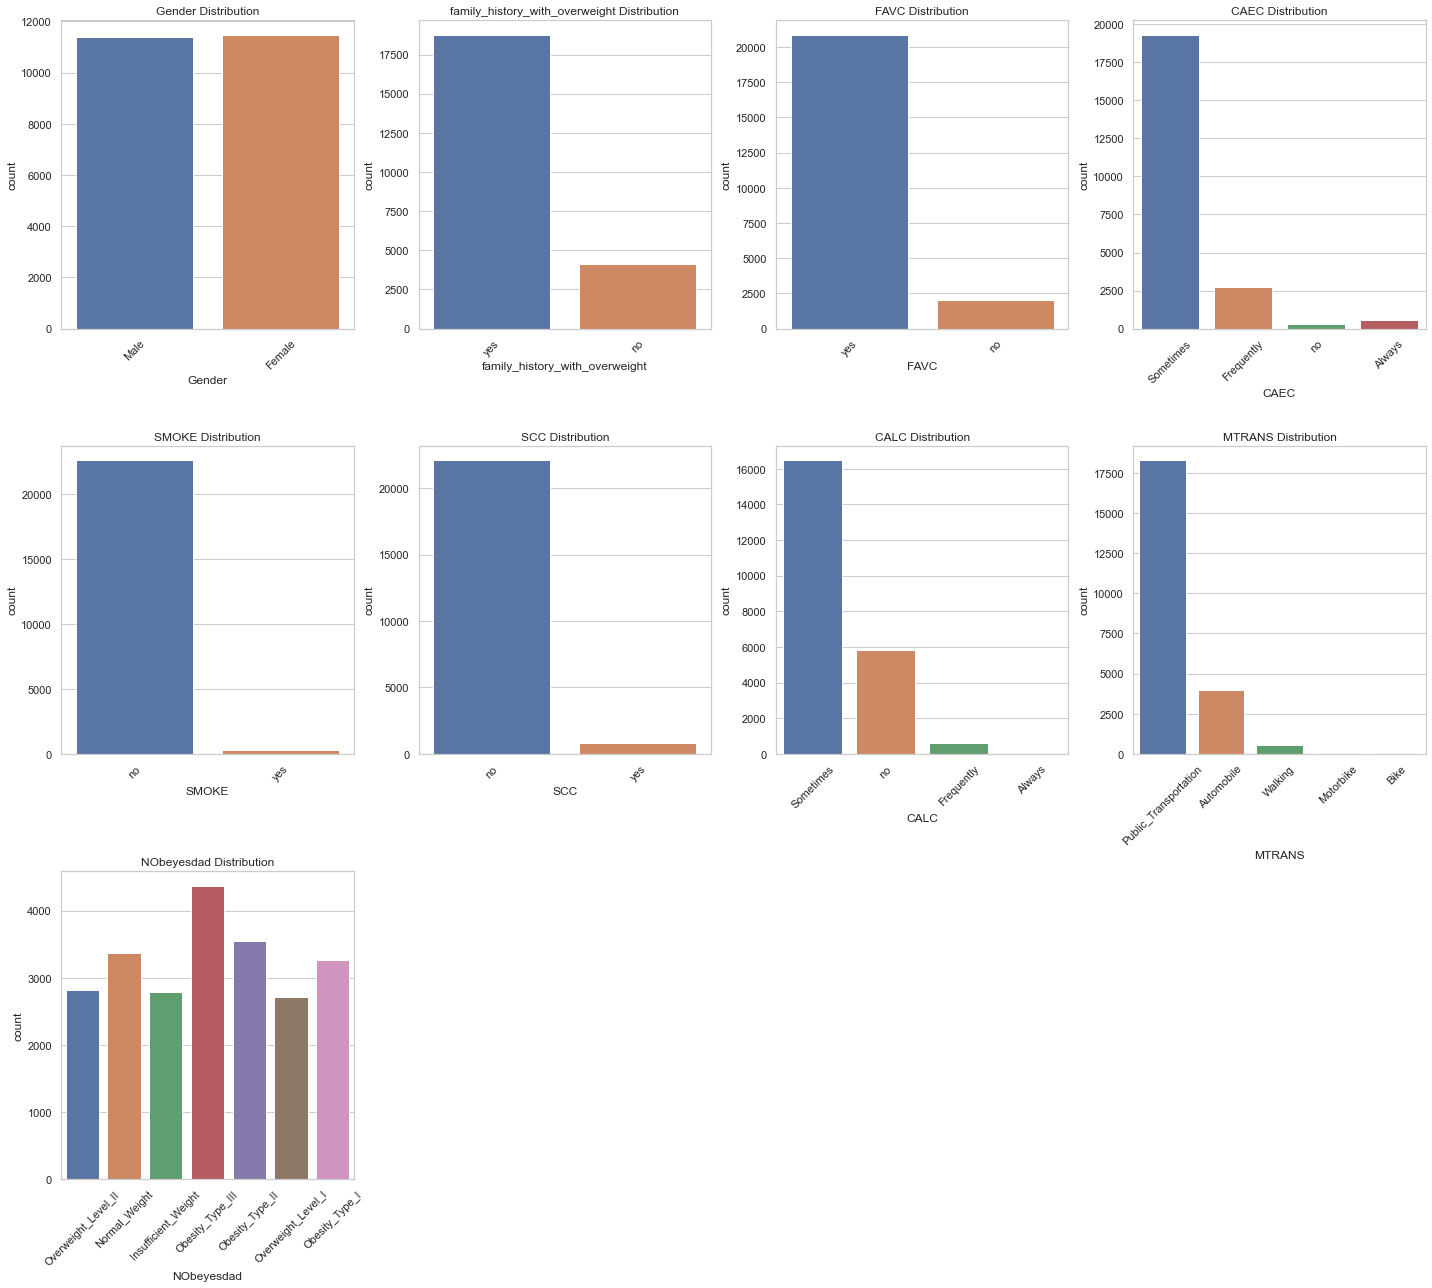

In [21]:
 #this code generates a grid of countplots for each categorical column in your dataset, arranging them in rows and columns, with 4 plots per row, and with proper titles and x-axis label rotatie
plt.figure(figsize=(20,6 *3))
for i ,col in enumerate(categorical_columns,1):
    plt.subplot(3, 4, i)
    sns.countplot(x= col, data=train_copy)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

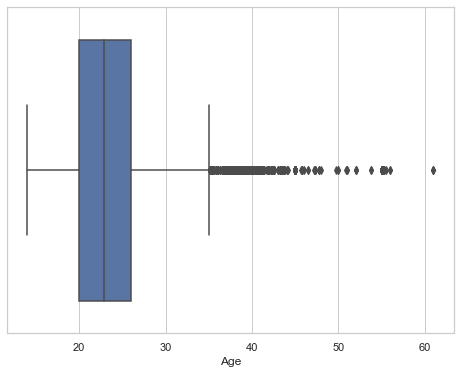

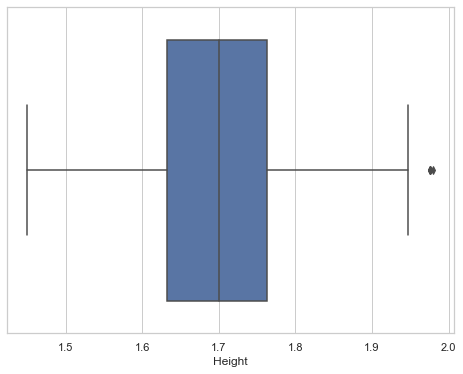

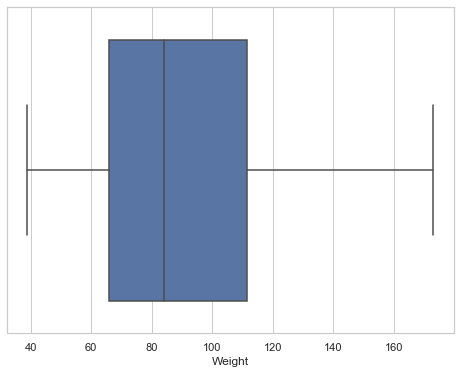

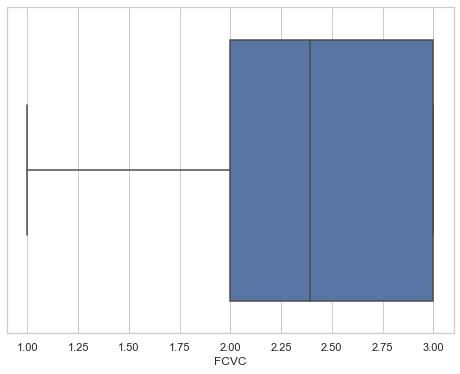

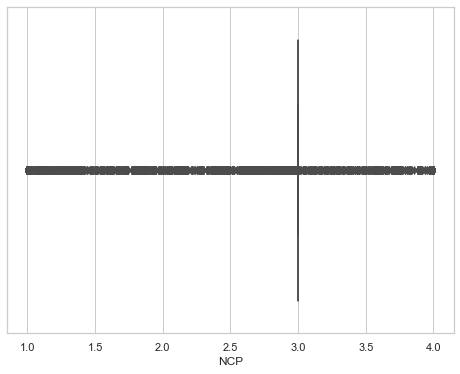

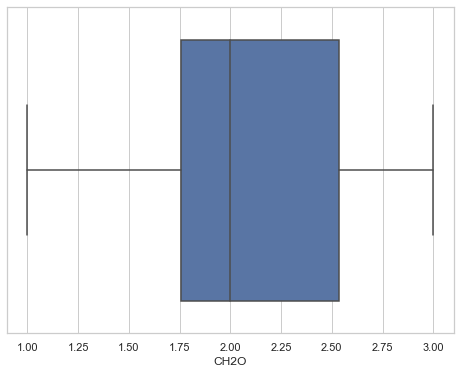

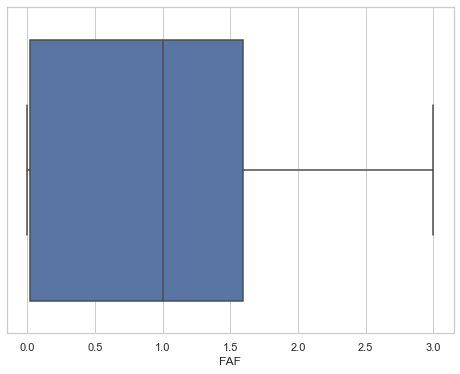

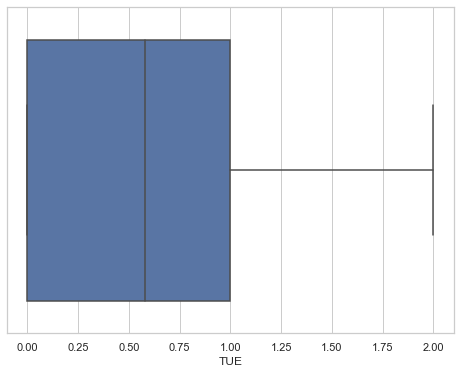

In [22]:
# detect outliers
for col in train_copy.columns:
    if train[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=train, x=col)
        plt.xlabel(col)
        plt.show()

# ----------------

# `04` Data Preparation

In [23]:
# remove duplicates
train_copy = train_copy.drop_duplicates()
train_copy.shape

(22845, 17)

In [24]:
# round numerical coulmns
numerical_columns = train_copy.select_dtypes(exclude=['object'])
numeric=numerical_columns.drop(['Height','Weight'], axis=1).columns.to_list()
train_copy[numeric] = train_copy[numeric].round().astype(int)

In [25]:
train_copy

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24,1.699998,81.669950,yes,yes,2,3,Sometimes,no,3,no,0,1,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18,1.560000,57.000000,yes,yes,2,3,Frequently,no,2,no,1,1,no,Automobile,Normal_Weight
2,Female,18,1.711460,50.165754,yes,yes,2,1,Sometimes,no,2,no,1,2,no,Public_Transportation,Insufficient_Weight
3,Female,21,1.710730,131.274851,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,32,1.914186,93.798055,yes,yes,3,2,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,Female,21,1.710730,131.408528,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
22865,Female,22,1.748584,133.742943,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
22866,Female,23,1.752206,133.689352,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
22867,Female,24,1.739450,133.346641,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


In [26]:
# robust scalar
rs=RobustScaler()
numerical_columns=numerical_columns.columns.tolist()
train_copy[numerical_columns]=rs.fit_transform(train_copy[numerical_columns])

In [27]:
train_copy

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,0.166667,-0.000015,-0.051175,yes,yes,0.0,0.0,Sometimes,no,1.0,no,-0.5,0.0,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,-0.833333,-1.067293,-0.593000,yes,yes,0.0,0.0,Frequently,no,0.0,no,0.0,0.0,no,Automobile,Normal_Weight
2,Female,-0.833333,0.087366,-0.743100,yes,yes,0.0,-2.0,Sometimes,no,0.0,no,0.0,1.0,no,Public_Transportation,Insufficient_Weight
3,Female,-0.333333,0.081800,1.038296,yes,yes,1.0,0.0,Sometimes,no,0.0,no,0.0,0.0,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,1.500000,1.632851,0.215194,yes,yes,1.0,-1.0,Sometimes,no,0.0,no,0.5,0.0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,Female,-0.333333,0.081800,1.041231,yes,yes,1.0,0.0,Sometimes,no,0.0,no,0.5,0.0,Sometimes,Public_Transportation,Obesity_Type_III
22865,Female,-0.166667,0.370381,1.092502,yes,yes,1.0,0.0,Sometimes,no,0.0,no,0.0,0.0,Sometimes,Public_Transportation,Obesity_Type_III
22866,Female,0.000000,0.397993,1.091325,yes,yes,1.0,0.0,Sometimes,no,0.0,no,0.0,0.0,Sometimes,Public_Transportation,Obesity_Type_III
22867,Female,0.166667,0.300748,1.083798,yes,yes,1.0,0.0,Sometimes,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Obesity_Type_III


In [28]:
# encoding categories 
ohe = OneHotEncoder(handle_unknown="ignore",sparse_output=False).set_output(transform="pandas")
cat_columns = train_copy.select_dtypes(include=['object']).drop('NObeyesdad', axis=1)


In [29]:
cat_columns=cat_columns.columns.tolist()

transformed_data = ohe.fit_transform(train_copy[cat_columns])


In [30]:
transformed_data

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22865,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22866,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22867,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
train_copy=pd.concat([train_copy,transformed_data],axis=1).drop(columns=['Gender','family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

In [32]:
train_copy

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.166667,-0.000015,-0.051175,0.0,0.0,1.0,-0.5,0.0,Overweight_Level_II,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.833333,-1.067293,-0.593000,0.0,0.0,0.0,0.0,0.0,Normal_Weight,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-0.833333,0.087366,-0.743100,0.0,-2.0,0.0,0.0,1.0,Insufficient_Weight,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.333333,0.081800,1.038296,1.0,0.0,0.0,0.0,0.0,Obesity_Type_III,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.500000,1.632851,0.215194,1.0,-1.0,0.0,0.5,0.0,Overweight_Level_II,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,-0.333333,0.081800,1.041231,1.0,0.0,0.0,0.5,0.0,Obesity_Type_III,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22865,-0.166667,0.370381,1.092502,1.0,0.0,0.0,0.0,0.0,Obesity_Type_III,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22866,0.000000,0.397993,1.091325,1.0,0.0,0.0,0.0,0.0,Obesity_Type_III,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22867,0.166667,0.300748,1.083798,1.0,0.0,1.0,0.0,0.0,Obesity_Type_III,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
train_copy

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.166667,-0.000015,-0.051175,0.0,0.0,1.0,-0.5,0.0,Overweight_Level_II,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.833333,-1.067293,-0.593000,0.0,0.0,0.0,0.0,0.0,Normal_Weight,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-0.833333,0.087366,-0.743100,0.0,-2.0,0.0,0.0,1.0,Insufficient_Weight,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.333333,0.081800,1.038296,1.0,0.0,0.0,0.0,0.0,Obesity_Type_III,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.500000,1.632851,0.215194,1.0,-1.0,0.0,0.5,0.0,Overweight_Level_II,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,-0.333333,0.081800,1.041231,1.0,0.0,0.0,0.5,0.0,Obesity_Type_III,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22865,-0.166667,0.370381,1.092502,1.0,0.0,0.0,0.0,0.0,Obesity_Type_III,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22866,0.000000,0.397993,1.091325,1.0,0.0,0.0,0.0,0.0,Obesity_Type_III,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22867,0.166667,0.300748,1.083798,1.0,0.0,1.0,0.0,0.0,Obesity_Type_III,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
le=LabelEncoder()
train_copy["NObeyesdad"]=le.fit_transform(train_copy["NObeyesdad"])

In [35]:
train_copy

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.166667,-0.000015,-0.051175,0.0,0.0,1.0,-0.5,0.0,6,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.833333,-1.067293,-0.593000,0.0,0.0,0.0,0.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-0.833333,0.087366,-0.743100,0.0,-2.0,0.0,0.0,1.0,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.333333,0.081800,1.038296,1.0,0.0,0.0,0.0,0.0,4,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.500000,1.632851,0.215194,1.0,-1.0,0.0,0.5,0.0,6,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,-0.333333,0.081800,1.041231,1.0,0.0,0.0,0.5,0.0,4,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22865,-0.166667,0.370381,1.092502,1.0,0.0,0.0,0.0,0.0,4,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22866,0.000000,0.397993,1.091325,1.0,0.0,0.0,0.0,0.0,4,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22867,0.166667,0.300748,1.083798,1.0,0.0,1.0,0.0,0.0,4,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# perpare test set

In [36]:
test_copy=test.copy()


In [37]:
test_copy = test_copy.drop_duplicates()

In [38]:
if "id"  in test_copy.columns:
    test_copy.drop("id",axis=1,inplace=True)

In [39]:
numerical_columns = test_copy.select_dtypes(exclude=['object'])
numeric=numerical_columns.drop(['Height','Weight'], axis=1).columns.to_list()
test_copy[numeric] = test_copy[numeric].round().astype(int) 

In [40]:
numerical_columns=numerical_columns.columns.tolist()

test_copy[numerical_columns]=rs.transform(test_copy[numerical_columns])

In [41]:
cat_columns = test_copy.select_dtypes(include=['object'])
cat_columns=cat_columns.columns.tolist()

transformed_data = ohe.transform(test_copy[cat_columns])
test_copy=pd.concat([test_copy,transformed_data],axis=1).drop(columns=['Gender','family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

# Models


#  DT BEFOR PCA

In [42]:

X = train_copy.drop(['NObeyesdad'], axis=1)
y_train = train_copy['NObeyesdad']
x_test=test_copy

In [43]:
X_train, X_val, Y_train, y_val = train_test_split(X, y_train, test_size=0.3, random_state=42)

In [44]:
original_tree = DecisionTreeClassifier(random_state=42)


# Decision trees after PCA

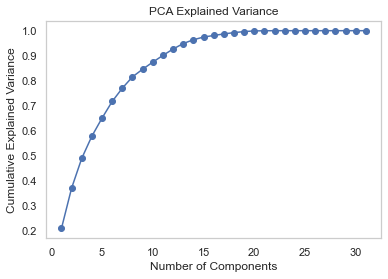

Optimal number of PCA components: 18


In [45]:
pca = PCA()
pca.fit(X_train)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

#plot between number of pca and cumulative_explained_variance 
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()


optimal_num_components = np.where(cumulative_explained_variance >= 0.99 )[0][0] + 1

print(f"Optimal number of PCA components: {optimal_num_components}")

In [46]:
print(cumulative_explained_variance)

[0.21091572 0.3717591  0.49051892 0.57922413 0.6511273  0.7176046
 0.77069206 0.81575514 0.84623992 0.87447483 0.9014062  0.9267632
 0.94869037 0.96383903 0.97453022 0.98087629 0.98707144 0.99228955
 0.99646433 0.99912837 0.99965871 0.9999855  1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


In [47]:
pca = PCA(n_components=optimal_num_components)

X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform( X_val)

# Fit a Decision Tree Classifier on the PCA-transformed dataset
pca_tree = DecisionTreeClassifier(random_state=42)

# scores for DT with /out pca

In [48]:
def evaluate_model(clf, X_train, y_train, X_validation, y_validation):
    # Train the model
    clf.fit(X_train, y_train)

    # Predict on train and validation sets
    y_pred_train = clf.predict(X_train)
    y_pred_validation = clf.predict(X_validation)

    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, y_pred_train)
    validation_accuracy = accuracy_score(y_validation, y_pred_validation)

    # Print results
    print(f'Model: {clf.__class__.__name__}')
    print(f'Train Accuracy: {train_accuracy:.3f}')
    print(f'Validation Accuracy: {validation_accuracy:.3f}')

   

    print('===========================')
    return y_pred_validation

original_predictions=evaluate_model(original_tree, X_train, Y_train, X_val, y_val)
pca_predictions=evaluate_model(pca_tree, X_train_pca, Y_train, X_val_pca, y_val)

Model: DecisionTreeClassifier
Train Accuracy: 1.000
Validation Accuracy: 0.850
Model: DecisionTreeClassifier
Train Accuracy: 1.000
Validation Accuracy: 0.716


# regularization 

In [49]:
original_tree_regul = DecisionTreeClassifier(criterion="gini",max_depth=8,min_samples_leaf=1,min_samples_split=5,random_state=42)
original_predictions_regul=evaluate_model(original_tree_regul, X_train, Y_train, X_val, y_val)



Model: DecisionTreeClassifier
Train Accuracy: 0.898
Validation Accuracy: 0.886


In [50]:
pca_predictions_regul=evaluate_model(original_tree_regul, X_train_pca, Y_train, X_val_pca, y_val)

Model: DecisionTreeClassifier
Train Accuracy: 0.721
Validation Accuracy: 0.685


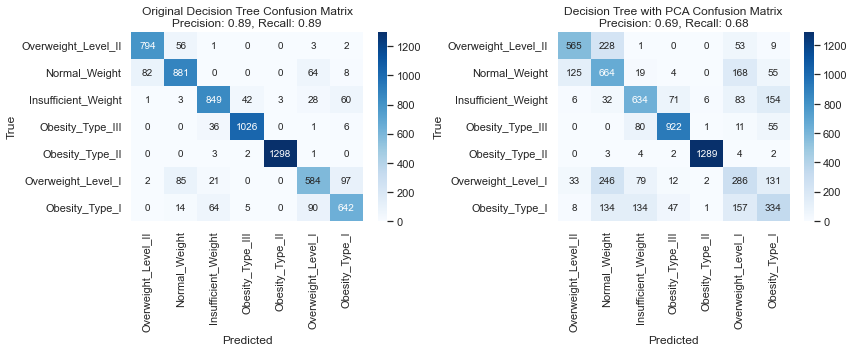

In [51]:
plt.figure(figsize=(12, 5))
pca_cm = confusion_matrix(y_val,pca_predictions_regul )
orginal_cm = confusion_matrix(y_val,original_predictions_regul)

original_precision = precision_score(y_val, original_predictions_regul, average='weighted')
original_recall = recall_score(y_val, original_predictions_regul, average='weighted')

pca_precision=precision_score(y_val, pca_predictions_regul, average='weighted')
pca_recall= recall_score(y_val,pca_predictions_regul, average='weighted')

plt.subplot(1, 2, 1)
sns.heatmap(orginal_cm, annot=True, fmt="d", cmap="Blues", xticklabels=train['NObeyesdad'].unique(), yticklabels=train['NObeyesdad'].unique())
plt.title("Original Decision Tree Confusion Matrix\nPrecision: {:.2f}, Recall: {:.2f}".format(original_precision, original_recall))
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 2, 2)
sns.heatmap(pca_cm, annot=True, fmt="d", cmap="Blues", xticklabels=train['NObeyesdad'].unique(), yticklabels=train['NObeyesdad'].unique())
plt.title("Decision Tree with PCA Confusion Matrix\nPrecision: {:.2f}, Recall: {:.2f}".format(pca_precision, pca_recall))
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()

# tuning hyper parameters using grid search 

In [52]:
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,40).tolist()[0::2],
              'min_samples_leaf':np.arange(1,20).tolist()[0::2]}


g1 = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, cv=5, n_jobs=-1)
start_time = time.time()
g1.fit(X_train,Y_train)

duration = time.time() - start_time

cls_params1 = g1.best_params_


In [53]:
cls_params1

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 7,
 'min_samples_split': 18}

In [54]:
model1 = g1.best_estimator_

y_pred_train = model1.predict(X_train)
y_pred_validation = model1.predict(X_val)

# Calculate accuracy scores
train_accuracy = accuracy_score(Y_train, y_pred_train)
validation_accuracy = accuracy_score(y_val, y_pred_validation)

# Print results
print(f'Model: {model1.__class__.__name__}')
print(f'Train Accuracy: {train_accuracy:.3f}')
print(f'Validation Accuracy: {validation_accuracy:.3f}')



Model: DecisionTreeClassifier
Train Accuracy: 0.911
Validation Accuracy: 0.885


# random forrest

In [55]:
original_forest = RandomForestClassifier(random_state=42)
original_predictions_forest=evaluate_model(original_forest, X_train, Y_train, X_val, y_val)


Model: RandomForestClassifier
Train Accuracy: 1.000
Validation Accuracy: 0.886


In [62]:
from sklearn.model_selection import  RandomizedSearchCV
parametrs = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_leaf' : [4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_split' : [6, 8, 10, 12, 14, 16, 18, 20]}

randomized_rf = GridSearchCV(
   original_forest,
    parametrs,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)

randomized_rf.fit(X_train,Y_train)


cls_params1 = randomized_rf.best_params_

In [63]:
cls_params1

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 300}

In [64]:

model = randomized_rf.best_estimator_

y_pred_train = model.predict(X_train)
y_pred_validation = model.predict(X_val)

# Calculate accuracy scores
train_accuracy = accuracy_score(Y_train, y_pred_train)
validation_accuracy = accuracy_score(y_val, y_pred_validation)

# Print results
print(f'Model: {model.__class__.__name__}')
print(f'Train Accuracy: {train_accuracy:.3f}')
print(f'Validation Accuracy: {validation_accuracy:.3f}')


Model: RandomForestClassifier
Train Accuracy: 0.933
Validation Accuracy: 0.886


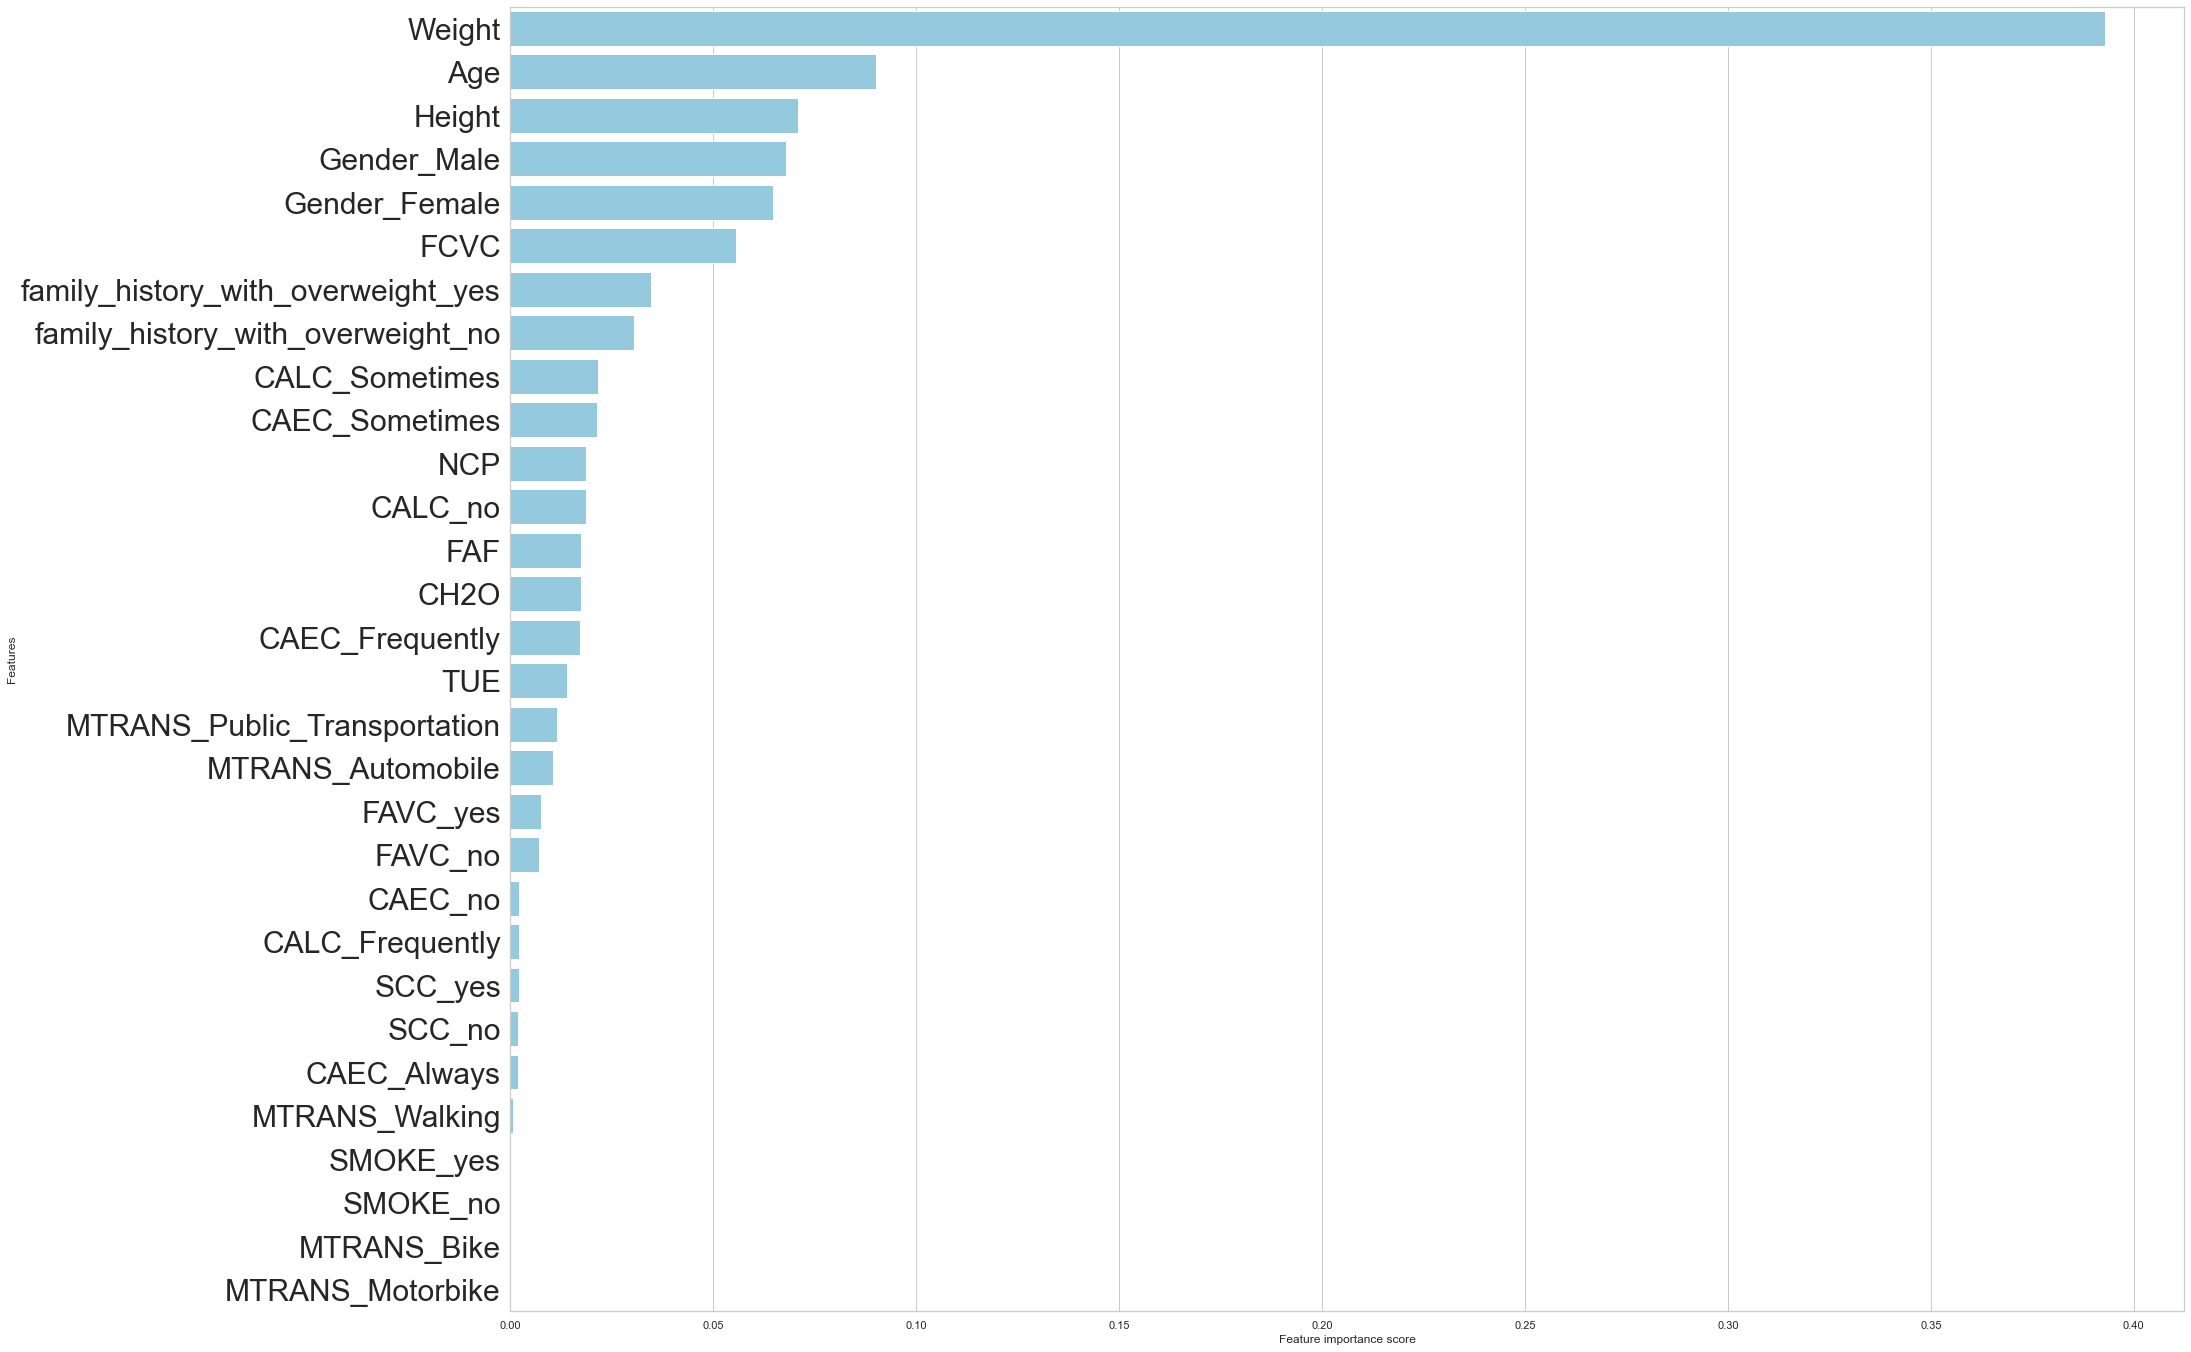

In [67]:

feature_scores = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
TOP = 30
top_feature_scores = feature_scores[:TOP]
f, ax = plt.subplots(figsize=(30, 24))
sns.barplot(x=top_feature_scores, y=top_feature_scores.index,color='skyblue')
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
ax.set_yticklabels(top_feature_scores.index, fontdict={'fontsize': 30})
plt.show()

In [ ]:
predict=model.predict(x_test)
submission=pd.DataFrame({"id":test['id'],"NObeyesdad":predict})
submission['NObeyesdad']=le.inverse_transform(predict)
submission.to_csv("submission.csv",index=False)

In [ ]:
predict2=model1.predict(x_test)
submission2=pd.DataFrame({"id":test['id'],"NObeyesdad":predict2})
submission2['NObeyesdad']=le.inverse_transform(predict2)
submission2.to_csv("submission2.csv",index=False)

In [ ]:
selected_features=X_train[transformed_data.columns.to_list()]
selected_features=selected_features.columns.to_list()